This is the colab notebook for the session Introduction to Keras tuner with Tensorflow in TFUG.

**Use FashionMNIST to dataset to determine best hyperparameters among the defined search space.**

Notebook credits :


1.  Keras Tuner - https://keras-team.github.io/keras-tuner/examples/helloworld/
2.  TensorFlow Documentation - https://www.tensorflow.org/tutorials/keras/keras_tuner

3.   Python Programming - https://pythonprogramming.net/keras-tuner-optimizing-neural-network-tutorial/




In [ ]:
import tensorflow as tf
from tensorflow import keras

import IPython
print(tf.__version__)

2.2.0


In [ ]:
!pip install -U keras-tuner
import kerastuner as kt

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

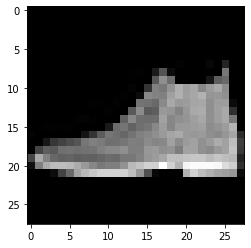

In [ ]:
# Normalize pixel values between 0 and 1

img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0


import matplotlib.pyplot as plt
%matplotlib inline
print(img_test[0])
plt.imshow(img_test[0], cmap="gray")

In [ ]:
def model_builder(hp):
  
  model = keras.Sequential()
  # model.add(keras.layers.Conv2D(hp.Int('input_units',
  #                               min_value=32,
  #                               max_value=256,
  #                               step=32), (3, 3), input_shape=img_train.shape[1:]))
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  # Add a dense layer
  # for i in range(hp.Int('num_layers', 1, 4)):
  #       model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32),
  #                              activation='relu'))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  

  
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     hyperband_iterations = 1,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')   

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
tuner.search_space_summary()

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:

#tuner.search(img_train, label_train, epochs = 3, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])
tuner.search(img_train, label_train, epochs = 3, validation_split=0.1, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]



INFO:tensorflow:Oracle triggered exit


In [ ]:
print("Optimal Units {} Optimal learning learning rate {} ".format(best_hps.get('units' ), best_hps.get('learning_rate') ))

Optimal Units 64 Optimal learning learning rate 0.001 


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
#model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))
model.fit(img_train, label_train, epochs = 10, validation_split=0.1, validation_data = (img_test, label_test), initial_epoch=1)


Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5334 - accuracy: 0.8155 - val_loss: 0.4436 - val_accuracy: 0.8390
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3942 - accuracy: 0.8601 - val_loss: 0.3866 - val_accuracy: 0.8610
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3595 - accuracy: 0.8709 - val_loss: 0.3870 - val_accuracy: 0.8595
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3350 - accuracy: 0.8785 - val_loss: 0.3834 - val_accuracy: 0.8623
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3179 - accuracy: 0.8840 - val_loss: 0.3618 - val_accuracy: 0.8682
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.8908 - val_loss: 0.3458 - val_accuracy: 0.8773
Epoch 8/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2886 - accuracy: 0.8949 - val_loss: 0.3698 - val_accuracy:

In [ ]:
# Get summary of results
tuner.results_summary()
# Get best models
model=tuner.get_best_models(num_models=2)[0]


In [ ]:
# Summary of our best model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.001,
 'tuner/bracket': 0,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units': 64}

In [ ]:
model.save('/content//tmp/best_model/best_fashion_mnist_model.hdf5')

In [ ]:
import numpy as np
img_test.reshape(len(img_test), 28, 28, 1)
predictions = model.predict(img_test)

print('test_label : ', test_label[0])
print('predicted_label : ', np.argmax(predictions[0]))

test_label :  9
predicted_label :  9


In [ ]:
rm -r 'my_dir'